# Laboratory Session 3
Alessandro Fella 2024285

In [2]:
# install.packages("greekLetters")
library("zoom")
library("scales")
library("cowplot")
library("plotly")
library("dplyr")
library("lubridate")
library("ggplot2")
library("gridExtra")
library("readr")
library("tidyverse")
library("repr")
library("greekLetters")

**Ex 01**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



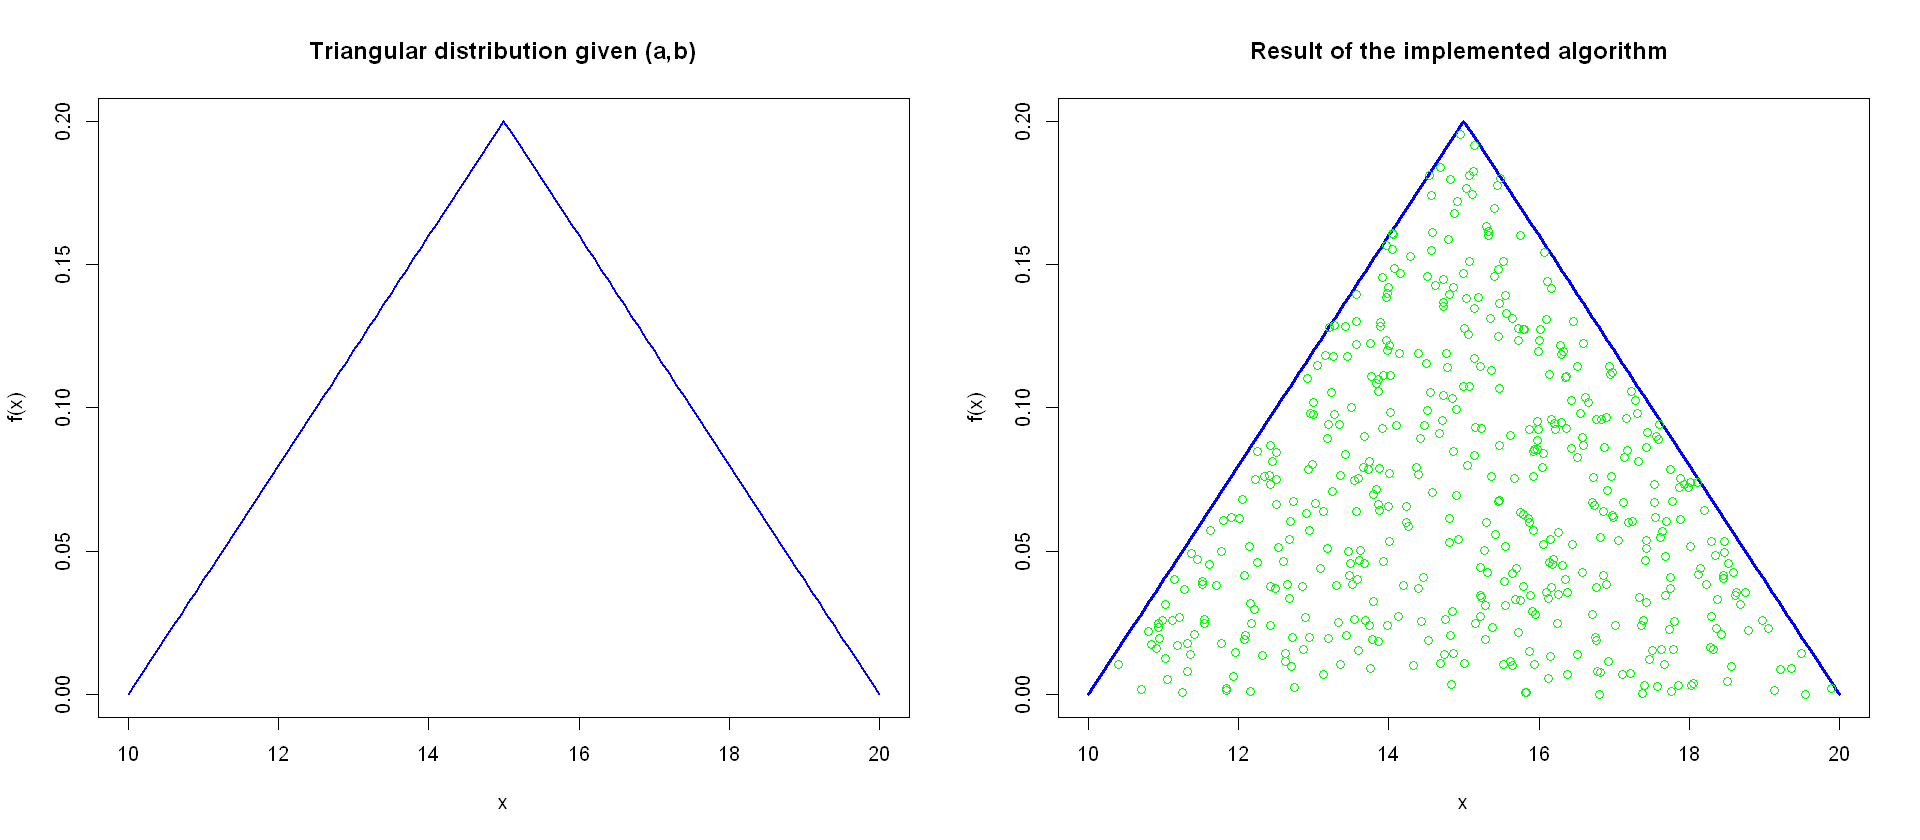

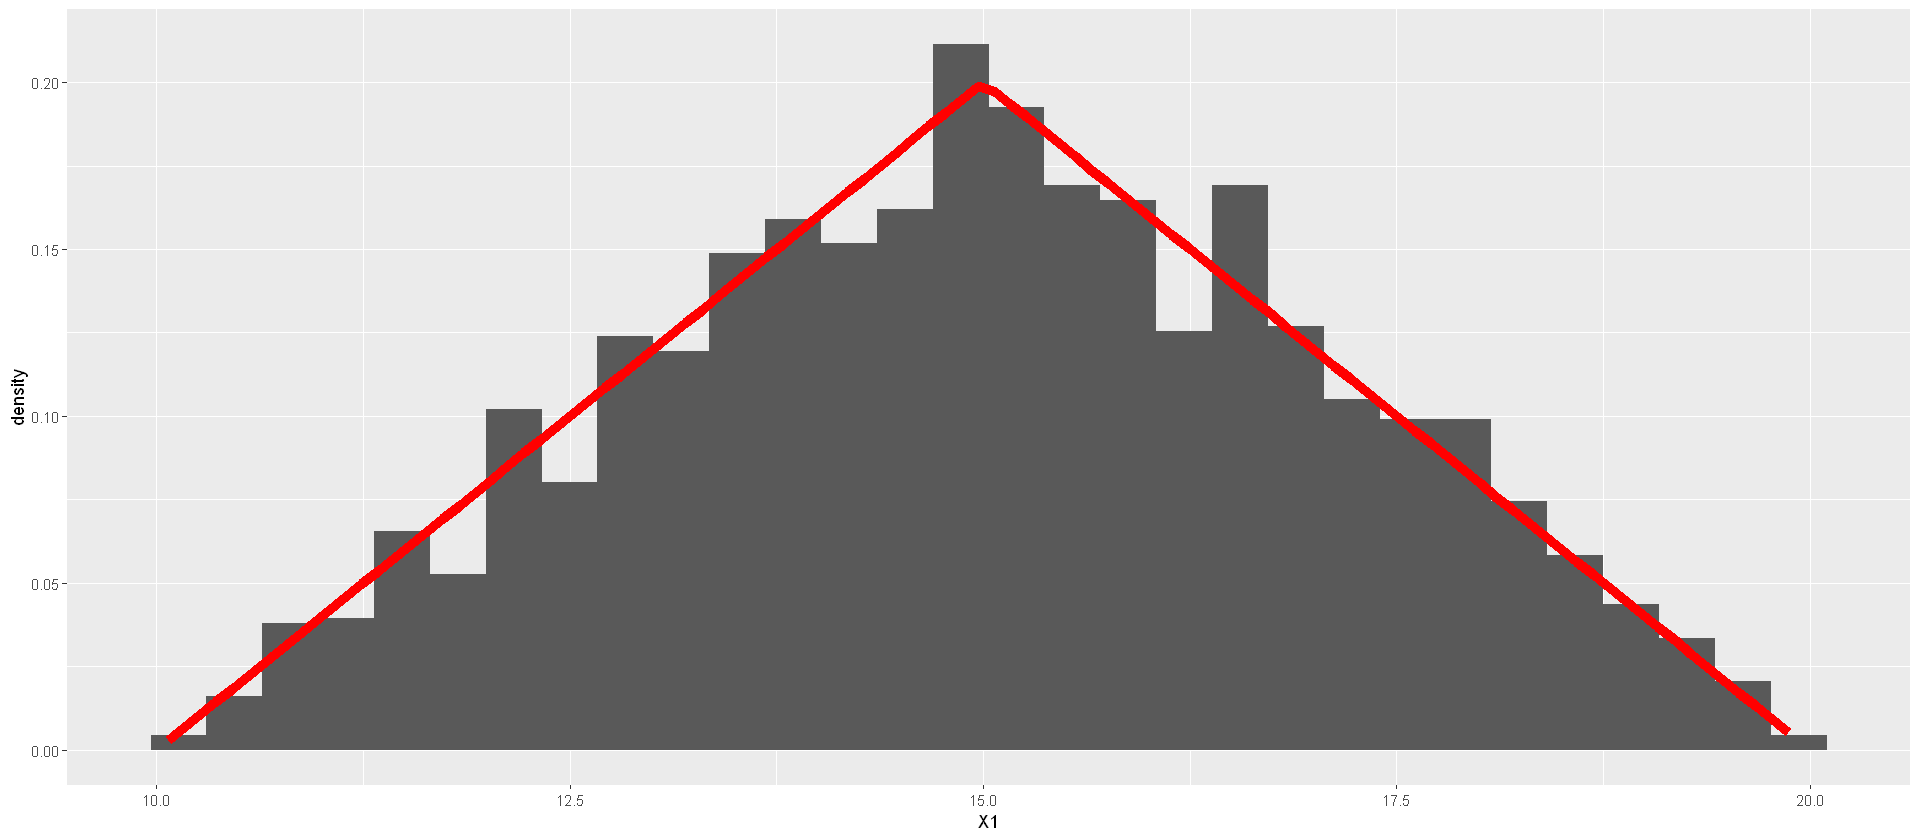

In [5]:
#PARAMETERS:
a=10;b=20;c=(a+b)/2;

#The triangular distribution, in the  generic interval (a, b) :
func<- Vectorize(function(a,b,c,x){(a<= x & x< c)*(2*(x-a)/((b-a)*(c-a)))+
                         (c <= x & x<= b)*(2*(b-x)/((b-a)*(b-c)))+
                         (x >b & x <a)*(0)})


#A) plot the function, given the interval (a, b)
par(mfrow=c(1,2))
options(repr.plot.width=16, repr.plot.height=7)
x<-seq(a,b,0.1)
p1<-plot(x,func(a,b,c,x), main="Triangular distribution given (a,b)",type="l", col="blue", lwd=2, pch=10,xlab="x", ylab="f(x)")


#B) write an algorithm to generate random numbers from the triangular distribution
# accept reject sampling
accept_reject<-Vectorize(function(x_random,y_random){
for(i in range(1,length(x_random)) ){
    if(y_random[i] <= func(a,b,c,x_random[i]))
               {   return (c(x_random[i],y_random[i]))   }
}} )   

x_sample = runif(1000, min=a, b)
y_sample = runif(1000, min=0, func(a,b,c,c))     
k<-accept_reject(x_sample,y_sample)
k<-k[lengths(k) != 0]
Matrix <- matrix(unlist(k), ncol = 2, byrow = TRUE)
p2<-plot(x,func(a,b,c,x), main="Result of the implemented algorithm ",type="l", col="blue", lwd=3, pch=10,xlab="x", ylab="f(x)")
points(Matrix[,1], Matrix[,2], col="green", lwd=1)


# C) generate 10^4 random number from the distribution, show them in an histogram and su perimpose the analytical curve
x_sample_new = runif(4000, min=a, b)
y_sample_new = runif(4000, min=0, func(a,b,c,c))
k_new<-accept_reject(x_sample_new,y_sample_new)
k_new<-k_new[lengths(k) != 0]
Matrix_new <- matrix(unlist(k_new), ncol = 2, byrow = TRUE)
data<-data.frame(Matrix_new)

ggplot(data, aes(x=X1)) +
  geom_histogram(aes(y = stat(density))) +
  stat_function(fun=function(x) do.call(func, list(a= a, b= b, c= c, x= x)), color = "red", lwd=3) #superimpose a costumized function
                


**Ex 02**

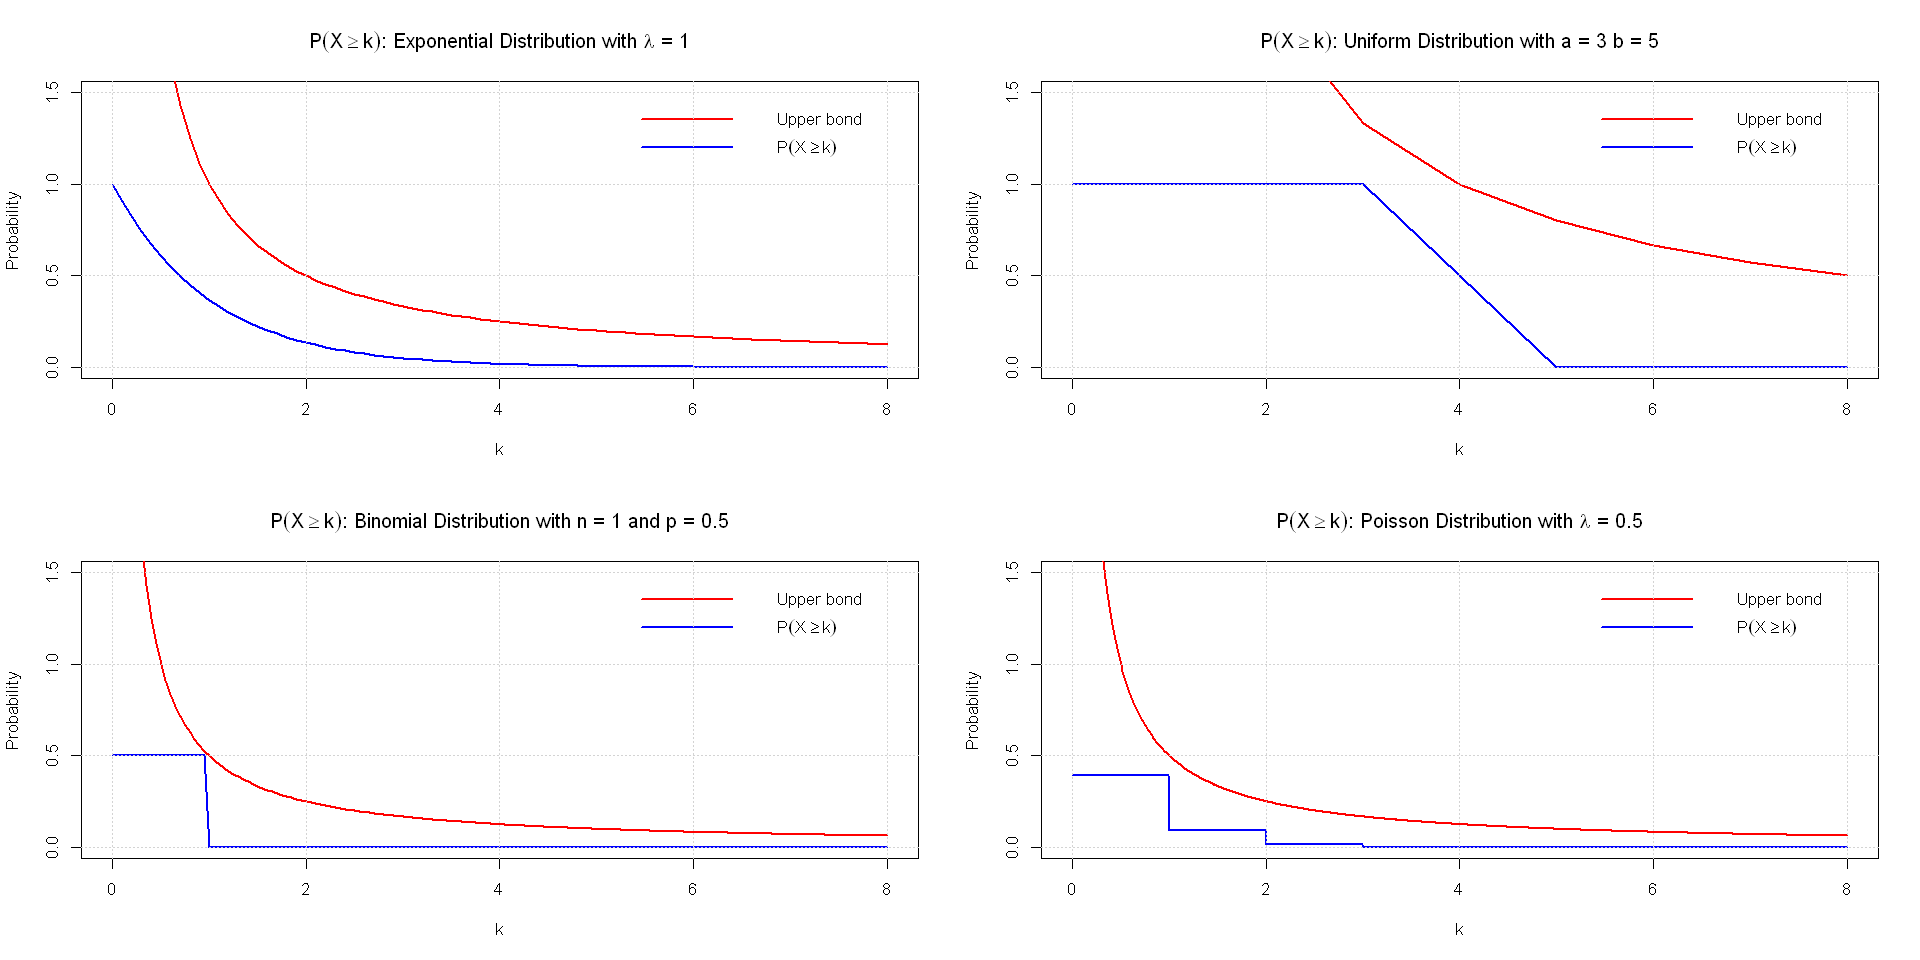

In [221]:
library(latex2exp) 
par(mfrow=c(2,2))
options(repr.plot.width=16, repr.plot.height=8)

# Exponential
lambda <- 1 
xValue <- seq(0, 8, 0.1)
yValue <- 1-pexp(xValue, rate = lambda)
# Upper bound
x_new <- xValue[-1]
exp <- 1/lambda     # Expectation value
ubound <- exp/x_new # Upper bounds
# Plot 
plot(xValue,yValue, type='l',lwd=2, col='blue', xlab='k', ylab="Probability",  
    main=expression(paste(P(X >= k),": Exponential Distribution with ", lambda," = 1")),
     ylim=c(0,1.5))
lines(x_new,ubound, type='l', col='red', lwd=2)
# Legend
legend(5,1.5,
       legend = c("Upper bond", expression(P(X>=k))),
       lty = c(1, 1), col = c("red", "blue"), lwd = 2, 
       box.lty=1, box.lwd=1, box.col="black",
       bty = "n")
grid()


# UNIFORM
a=3;b=5;
xValue <- seq(0, 8, 1)
yValue <- 1-punif(xValue, min = a, max = b)
unif_data <- tibble(xValue,yValue)
# Upper bound
x_new <- xValue[-1]
exp <- (a+b)/2      # Expectation value
ubound <- exp/x_new # Upper bounds
# Plot  
plot(xValue,yValue, type='l',lwd=2, col='blue', xlab='k',
     ylab="Probability",main=expression(paste(P(X >= k),": Uniform Distribution with ", a," = 3 ",b," = 5")), ylim=c(0,1.5))
lines(x_new,ubound, type='l', col='red', lwd=2)
# Legend
legend(5,1.5,
       legend = c("Upper bond", expression(P(X>=k))),
       lty = c(1, 1), col = c("red", "blue"), lwd = 2, 
       box.lty=1, box.lwd=1, box.col="black",
       bty = "n")
grid()

# BINOMIAL
n <- 1
p <- 1/2
xValue <- seq(0, 8,0.05)
yValue <- 1-pbinom(xValue,n,p)
bin_data <- tibble(xValue,yValue)
# Upper bound
x_new <- xValue[-1]
exp <- n*p          # Expectation value
ubound <- exp/x_new # Upper bounds
# Plot 
plot(xValue,yValue, type='l',lwd=2, col='blue', xlab='k',
     ylab="Probability",main=expression(paste(P(X >= k),": Binomial Distribution with ",n, " = 1 and ",p," = 0.5")),
    ylim=c(0,1.5))
lines(x_new,ubound, type='l', col='red', lwd=2)
# Legend
legend(5,1.5,
       legend = c("Upper bond", expression(P(X>=k))),
       lty = c(1, 1), col = c("red", "blue"), lwd = 2, 
       box.lty=1, box.lwd=1, box.col="black",
       bty = "n")
grid()



# POISSON
lambda<-1/2
xValue <- seq(0, 8, 0.01)
yValue <-1-ppois(xValue, lambda)
pois_data <- tibble(xValue,yValue)
# Upper bound
x_new <- xValue[-1]
exp <- lambda       #expectation value
ubound <- exp/x_new # vector of upper bounds

# Plot 
plot(xValue,yValue, type='l',lwd=2, col='blue', xlab='k',
     ylab="Probability",main=expression(paste(P(X >= k),": Poisson Distribution with ", lambda," = 0.5")), ylim=c(0,1.5))
lines(x_new,ubound, type='l', col='red', lwd=2)
# Legend
legend(5,1.5,
       legend = c("Upper bond", expression(P(X>=k))),
       lty = c(1, 1), col = c("red", "blue"), lwd = 2, 
       box.lty=1, box.lwd=1, box.col="black",
       bty = "n")
grid()

**Ex 03**

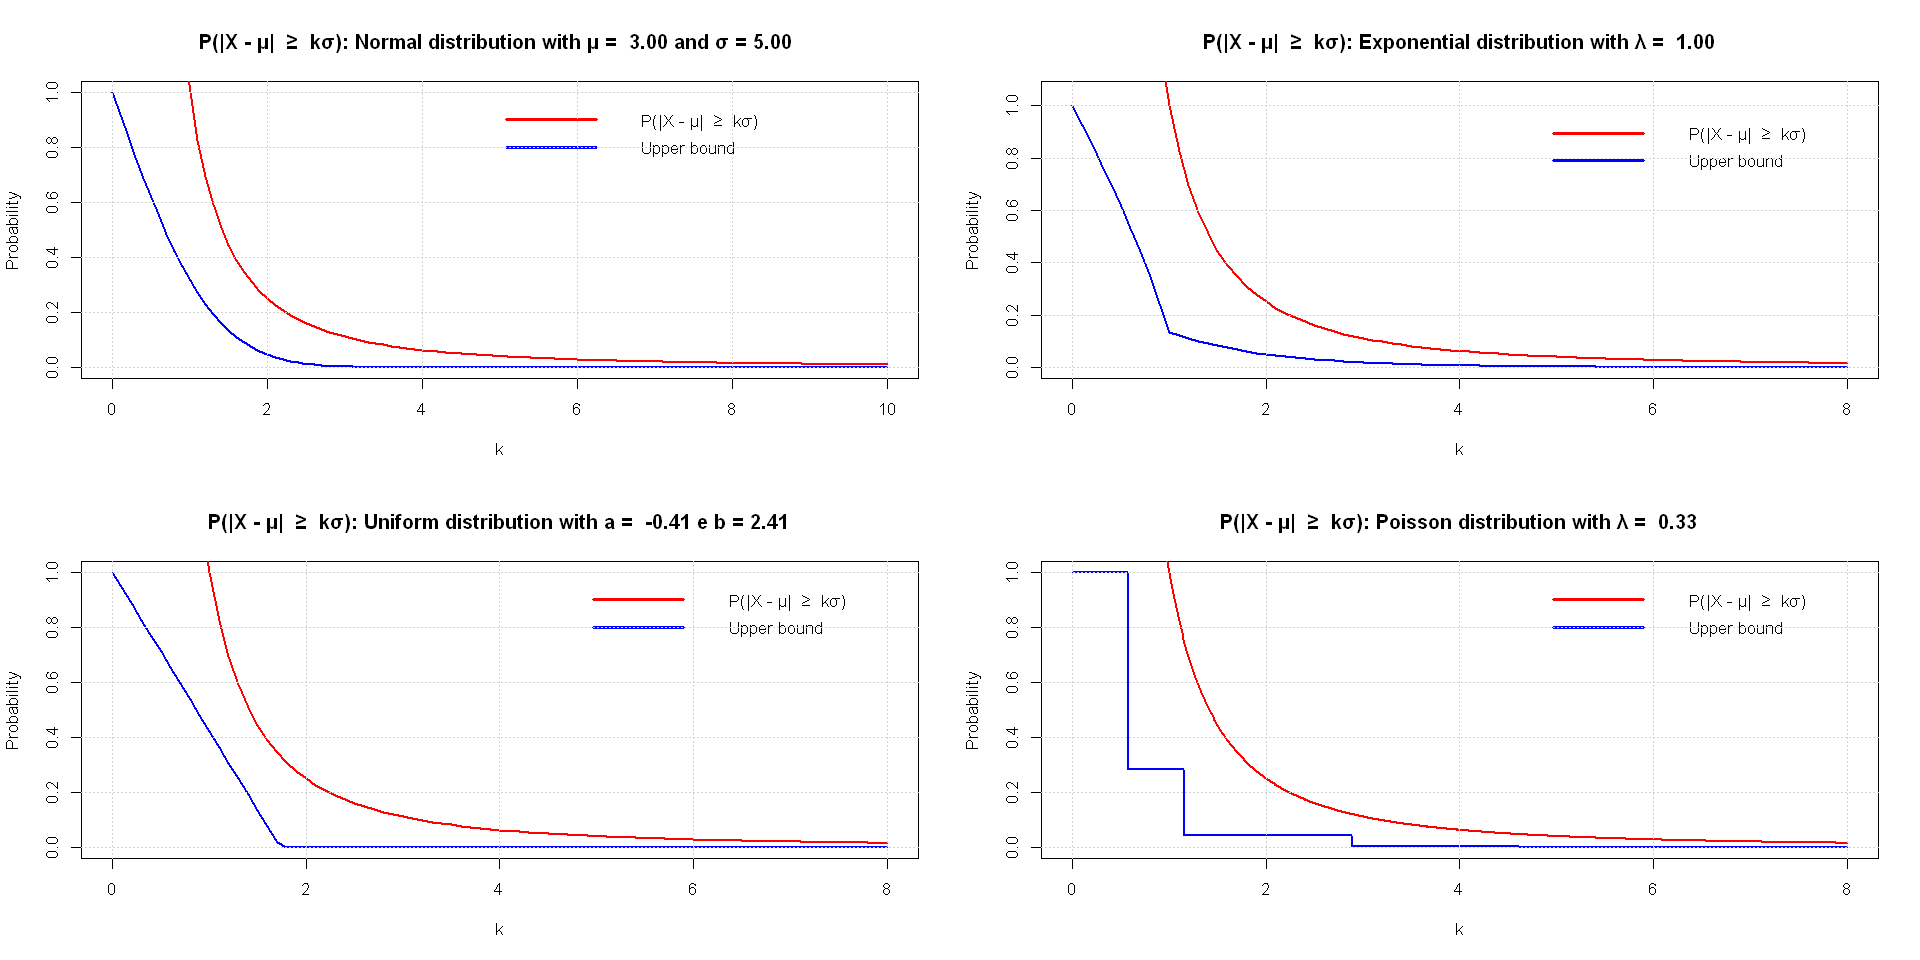

In [444]:
library(latex2exp) 
par(mfrow=c(2,2))

# NORMAL
mu <- 3                      # expectation value
sigma <- 5                   # variance 
xValue <- seq(0,10,0.1)
yValue <- 1 - pnorm((xValue*sigma+mu),mean=mu,sd=sigma) + pnorm((-xValue*sigma+mu),mean=mu,sd=sigma)
norm_data <- tibble(xValue,yValue)
# Upper bound
x_new <- xValue[-1]
ubound <- 1/(x_new^2)         # Upper bounds
# Plot 
plot(xValue,yValue, type='l',lwd=2, col='blue', xlab='k',
     ylab="Probability",
     main=sprintf("P(|X - \u03bc|  \u2265  k\u03c3): Normal distribution with \u03bc =  %.2f and \u03c3 = %.2f ", mu,sigma)
     ,ylim=c(0,1.0))
lines(x_new,ubound, type='l', col='red', lwd=2)
# Legend
legend(4.5,1,
       legend = c("P(|X - \u03bc|  \u2265  k\u03c3)", "Upper bound"),
       lty = c(1, 1), col = c("red", "blue"), lwd = 3,cex=1, 
       box.lty=1, box.lwd=1, box.col="black",
       bty = "n")
grid()


# Exponential
lambda <- 1 
mu <- 1/lambda               # expectation value
sigma <- 1/(lambda)          # variance
xValue <- seq(0, 8, 0.1)
yValue <- 1-pexp((xValue*sigma+mu),lambda) + pexp((-xValue*sigma+mu),lambda)
# Upper bound
x_new <- xValue[-1]
ubound <- 1/(x_new^2)        # Upper bounds
# Plot 
plot(xValue,yValue, type='l',lwd=2, col='blue', xlab='k', ylab="Probability",  
        main=sprintf("P(|X - \u03bc|  \u2265  k\u03c3): Exponential distribution with \u03bb =  %.2f", lambda),
     ylim=c(0,1.05))
lines(x_new,ubound, type='l', col='red', lwd=2)
# Legend
legend(4.5,1,
       legend = c("P(|X - \u03bc|  \u2265  k\u03c3)", "Upper bound"),
       lty = c(1, 1), col = c("red", "blue"), lwd = 3,cex=1, 
       box.lty=1, box.lwd=1, box.col="black",
       bty = "n")
grid()


# UNIFORM
a=1-sqrt(2);b=1+sqrt(2);
mu <- (a+b)/2               # expectation value
sigma <- (b-a)/sqrt(12)     # variance
xValue <- seq(0, 8, 0.1)
yValue <- 1-punif((xValue*sigma+mu),a,b) + punif((-xValue*sigma+mu),a,b)

unif_data <- tibble(xValue,yValue)
# Upper bound
x_new <- xValue[-1]
ubound <- 1/(x_new^2)       # Upper bounds
# Plot  
plot(xValue,yValue, type='l',lwd=2, col='blue', xlab='k',
     ylab="Probability",
    main=sprintf("P(|X - \u03bc|  \u2265  k\u03c3): Uniform distribution with a =  %.2f e b = %.2f", a,b))
lines(x_new,ubound, type='l', col='red', lwd=2)
# Legend
legend(4.5,1,
       legend = c("P(|X - \u03bc|  \u2265  k\u03c3)", "Upper bound"),
       lty = c(1, 1), col = c("red", "blue"), lwd = 3,cex=1, 
       box.lty=1, box.lwd=1, box.col="black",
       bty = "n")
grid()



# POISSON
lambda<-1/3
mu <- lambda                # expectation value
sigma <- sqrt(lambda)       # variance
xValue <- seq(0, 8, 0.01)
yValue <-1-ppois((xValue*sigma+mu),lambda) + ppois((-xValue*sigma+mu),lambda)
pois_data <- tibble(xValue,yValue)
# Upper bound
x_new <- xValue[-1]
ubound <- 1/(x_new^2)       # Upper bounds

# Plot 
plot(xValue,yValue, type='l',lwd=2, col='blue', xlab='k',
     ylab="Probability",
      main=sprintf("P(|X - \u03bc|  \u2265  k\u03c3): Poisson distribution with \u03bb =  %.2f", lambda), ylim=c(0,1.0))
lines(x_new,ubound, type='l', col='red', lwd=2)
# Legend
legend(4.5,1,
       legend = c("P(|X - \u03bc|  \u2265  k\u03c3)", "Upper bound"),
       lty = c(1, 1), col = c("red", "blue"), lwd = 3,cex=1, 
       box.lty=1, box.lwd=1, box.col="black",
       bty = "n")
grid()





**Ex 04**

In [126]:
#1 Write R code that is able to read the file and import it in a tibble [4] structure
first_set <- read.csv("2020_ES_Region_Mobility_Report.csv", sep=",", header=T)
second_set <- read.csv("2020_FI_Region_Mobility_Report.csv", sep=",", header=T)


In [127]:
first_set$date <- as.Date(first_set$date)
second_set$date <- as.Date(second_set$date)
first_set<-first_set%>% filter(!is.na(retail_and_recreation_percent_change_from_baseline)) %>%
             filter(!is.na(grocery_and_pharmacy_percent_change_from_baseline))%>%
             filter(!is.na(parks_percent_change_from_baseline))%>%
             filter(!is.na(transit_stations_percent_change_from_baseline))%>%
             filter(!is.na(workplaces_percent_change_from_baseline))%>%
             filter(!is.na(residential_percent_change_from_baseline))


second_set<-second_set%>% filter(!is.na(retail_and_recreation_percent_change_from_baseline)) %>%
             filter(!is.na(grocery_and_pharmacy_percent_change_from_baseline))%>%
             filter(!is.na(parks_percent_change_from_baseline))%>%
             filter(!is.na(transit_stations_percent_change_from_baseline))%>%
             filter(!is.na(workplaces_percent_change_from_baseline))%>%
             filter(!is.na(residential_percent_change_from_baseline))


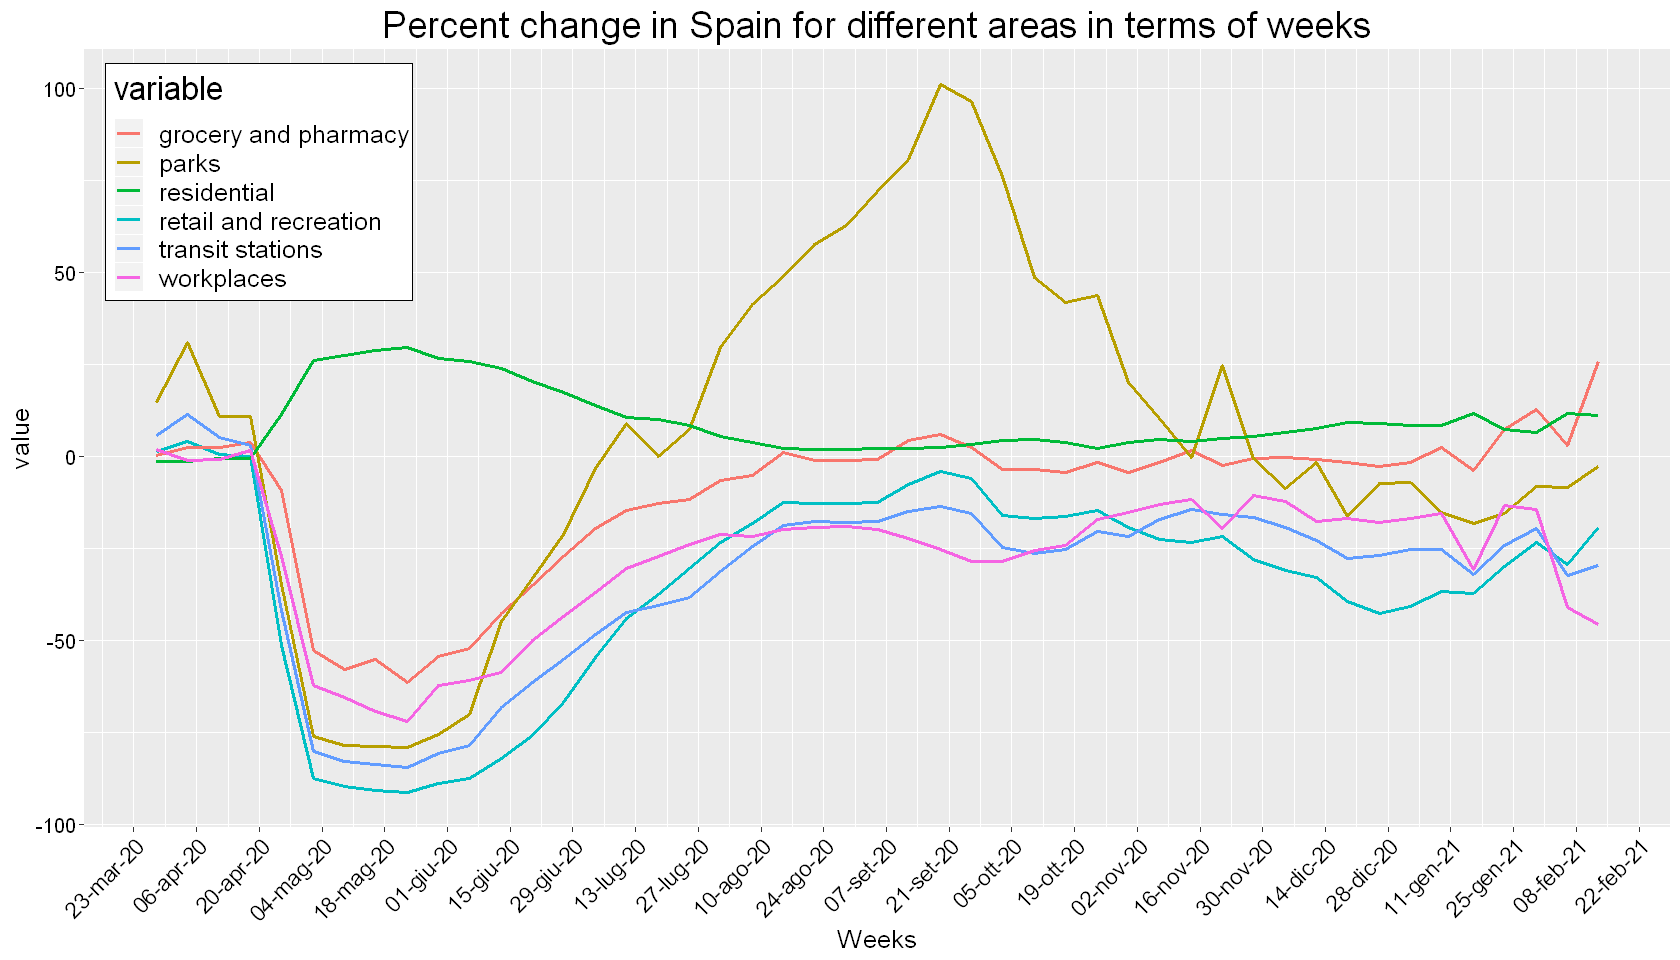

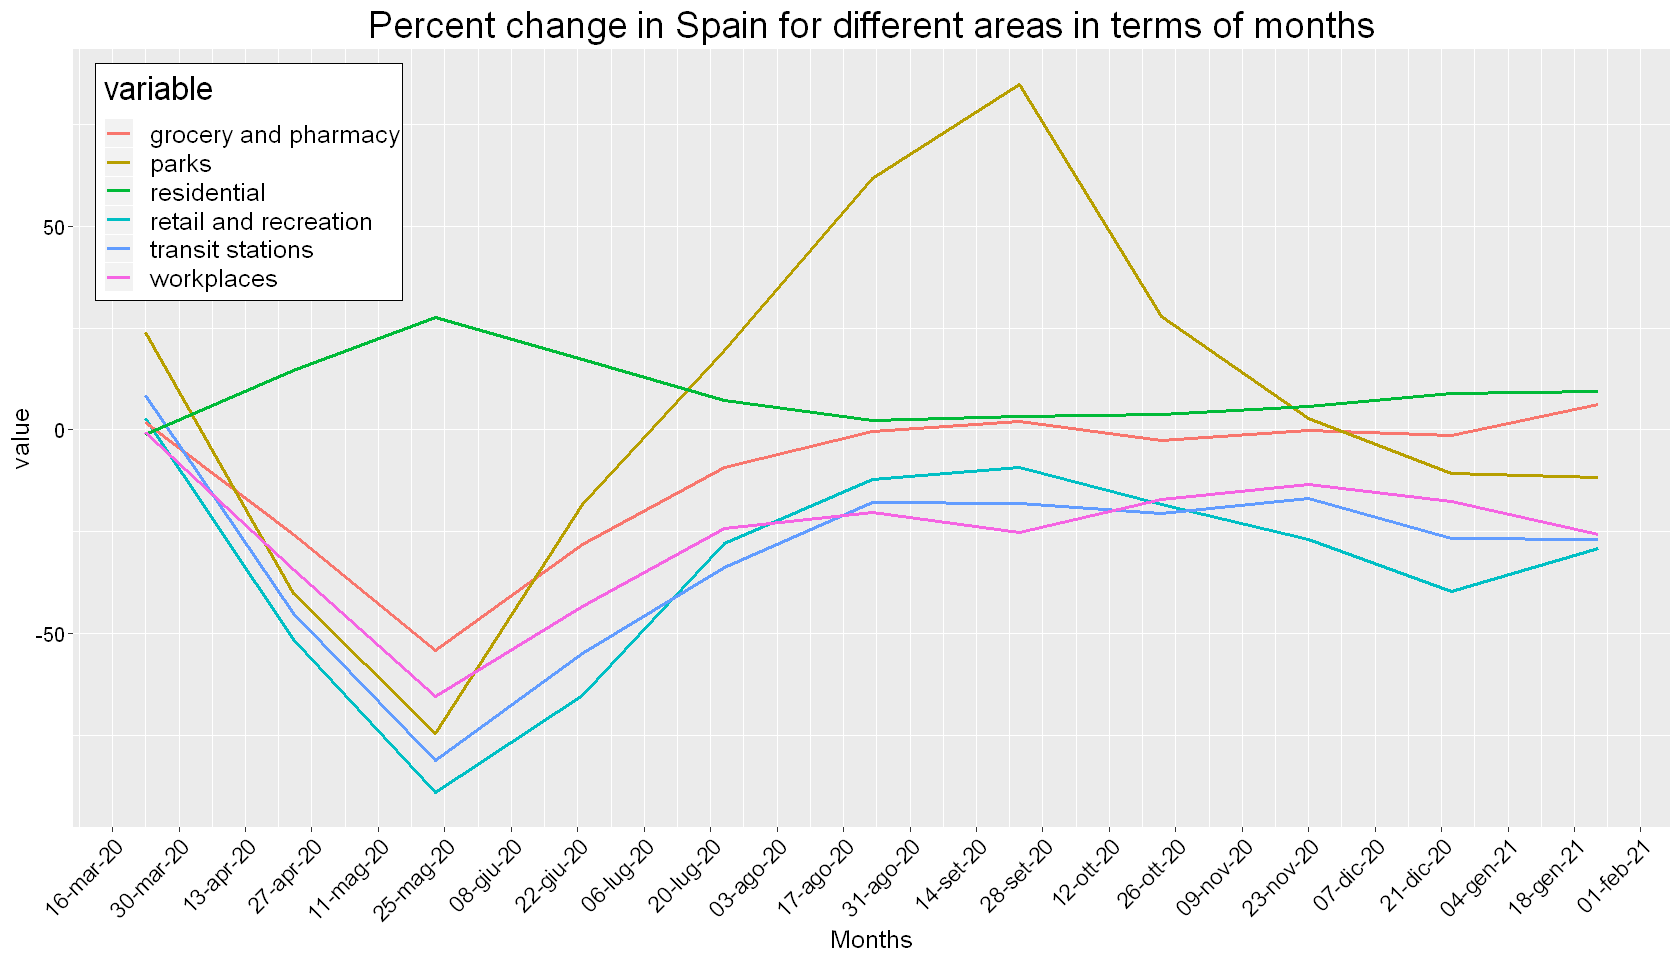

In [128]:
options(repr.plot.width=14, repr.plot.height=8)

first_new<-first_set %>% 
group_by(week = week(date))%>% 
summarise(retail_and_recreation = mean(retail_and_recreation_percent_change_from_baseline), grocery_and_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline),
         parks=mean(parks_percent_change_from_baseline),transit=mean(transit_stations_percent_change_from_baseline),
         residential=mean(residential_percent_change_from_baseline),workplaces=mean(workplaces_percent_change_from_baseline)) 
first_new$week<-lubridate::ymd( "2020-02-15" ) + lubridate::weeks( first_new$week - 1 )
ggplot(first_new, aes(x=week, y = value, color = variable)) + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1,colour = "black", size = rel(1.3)))+
    scale_x_date(breaks = date_breaks("2 weeks"),minor_breaks = date_breaks("1 week") , date_labels = "%d-%b-%y")+
    geom_line(aes(y = retail_and_recreation, col = "retail and recreation"), size=1) + 
    geom_line(aes(y = grocery_and_pharmacy, col = "grocery and pharmacy"),size=1)+
    geom_line(aes(y = parks, col = "parks"), size=1) + 
    geom_line(aes(y = transit, col = "transit stations"),size=1) +
    geom_line(aes(y = residential, col = "residential"),size=1)+
    geom_line(aes(y = workplaces, col = "workplaces"),size=1)+
    ggtitle("Percent change in Spain for different areas in terms of weeks") +
    theme(axis.text.y = element_text(angle = 0, hjust = 1,colour = "black", size = rel(1.2)))+
    theme(plot.title = element_text(hjust = 0.5, size = rel(2)))+
    theme(axis.text=element_text(hjust = 0.5, size=10), axis.title=element_text(size=15))+
    theme(legend.title = element_text(size = 20),legend.text = element_text(size = 15))+
    xlab("Weeks")+
    theme(legend.position = c(0.11, 0.83), legend.background = element_rect(fill = "white", color = "black"))

options(repr.plot.width=14, repr.plot.height=8)
first_new_new<-first_set %>% group_by(month = month(date)) %>% 
summarise(retail_and_recreation = mean(retail_and_recreation_percent_change_from_baseline), grocery_and_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline),
         parks=mean(parks_percent_change_from_baseline),transit=mean(transit_stations_percent_change_from_baseline),
         residential=mean(residential_percent_change_from_baseline),workplaces=mean(workplaces_percent_change_from_baseline)) 
first_new_new$month<-lubridate::ymd( "2020-03-23" ) %m+% months(0:10)
ggplot(first_new_new, aes(x=month, y = value, color = variable)) + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1,colour = "black", size = rel(1.3)))+
    scale_x_date(breaks = date_breaks("2 weeks"),minor_breaks = date_breaks("1 week") , date_labels = "%d-%b-%y")+
    geom_line(aes(y = retail_and_recreation, col = "retail and recreation"), size=1) + 
    geom_line(aes(y = grocery_and_pharmacy, col = "grocery and pharmacy"),size=1)+
    geom_line(aes(y = parks, col = "parks"), size=1) + 
    geom_line(aes(y = transit, col = "transit stations"),size=1) +
    geom_line(aes(y = residential, col = "residential"),size=1)+
    geom_line(aes(y = workplaces, col = "workplaces"),size=1)+
    ggtitle("Percent change in Spain for different areas in terms of months") +
    theme(axis.text.y = element_text(angle = 0, hjust = 1,colour = "black", size = rel(1.2)))+
    theme(plot.title = element_text(hjust = 0.5, size = rel(2)))+
    xlab("Months")+
    theme(axis.text=element_text(hjust = 0.5, size=10), axis.title=element_text(size=15))+
    theme(legend.title = element_text(size = 20),legend.text = element_text(size = 15))+
    theme(legend.position = c(0.11, 0.83), legend.background = element_rect(fill = "white", color = "black"))

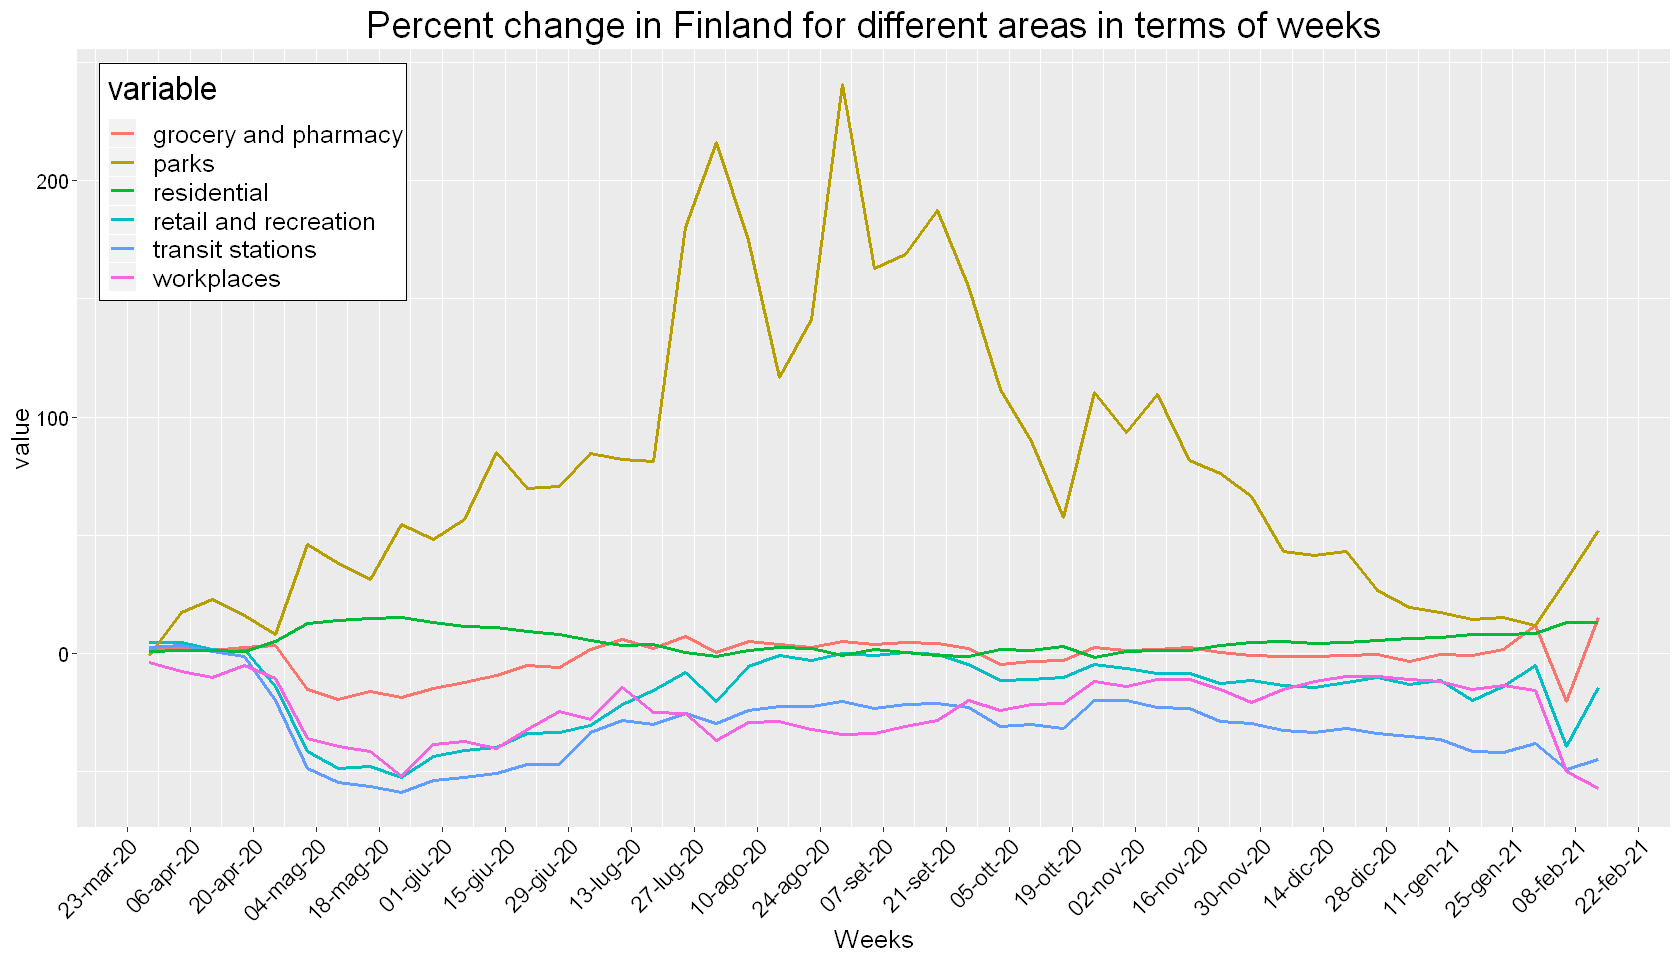

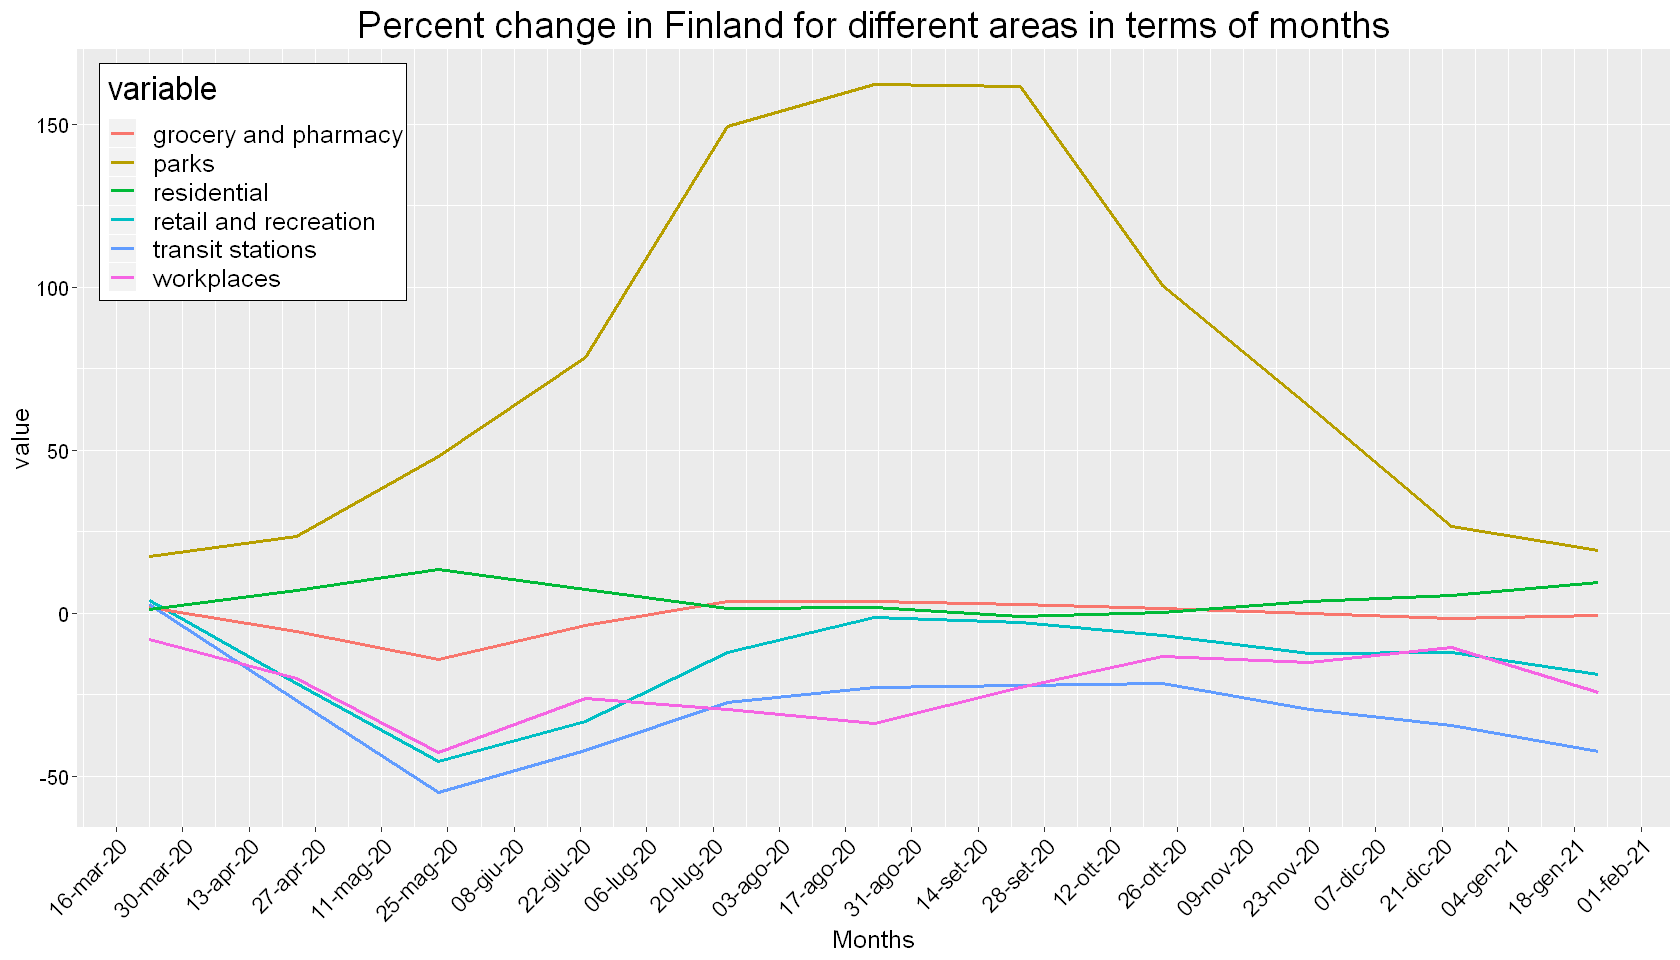

In [129]:
second_new<-second_set %>% group_by(week = week(date)) %>% 
summarise(retail_and_recreation = mean(retail_and_recreation_percent_change_from_baseline), grocery_and_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline),
         parks=mean(parks_percent_change_from_baseline),transit=mean(transit_stations_percent_change_from_baseline),
         residential=mean(residential_percent_change_from_baseline),workplaces=mean(workplaces_percent_change_from_baseline)) 
second_new$week<-lubridate::ymd( "2020-02-15" ) + lubridate::weeks( second_new$week - 1 )
ggplot(second_new, aes(x=week, y = value, color = variable)) + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1,colour = "black", size = rel(1.3)))+
    scale_x_date(breaks = date_breaks("2 weeks"),minor_breaks = date_breaks("1 week"), date_labels = "%d-%b-%y")+
    geom_line(aes(y = retail_and_recreation, col = "retail and recreation"), size=1) + 
    geom_line(aes(y = grocery_and_pharmacy, col = "grocery and pharmacy"),size=1)+
    geom_line(aes(y = parks, col = "parks"), size=1) + 
    geom_line(aes(y = transit, col = "transit stations"),size=1) +
    geom_line(aes(y = residential, col = "residential"),size=1)+
    geom_line(aes(y = workplaces, col = "workplaces"),size=1)+
    ggtitle("Percent change in Finland for different areas in terms of weeks") +
    theme(axis.text.y = element_text(angle = 0, hjust = 1,colour = "black", size = rel(1.2)))+
    theme(plot.title = element_text(hjust = 0.5, size = rel(2)))+
    theme(axis.text=element_text(hjust = 0.5, size=10), axis.title=element_text(size=15))+
    theme(legend.title = element_text(size = 20),legend.text = element_text(size = 15))+
    xlab("Weeks")+
    theme(legend.position =  c(0.11, 0.83), legend.background = element_rect(fill = "white", color = "black"))


second_new_new<-second_set %>% group_by(month = month(date)) %>% 
summarise(retail_and_recreation = mean(retail_and_recreation_percent_change_from_baseline), grocery_and_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline),
         parks=mean(parks_percent_change_from_baseline),transit=mean(transit_stations_percent_change_from_baseline),
         residential=mean(residential_percent_change_from_baseline),workplaces=mean(workplaces_percent_change_from_baseline)) 
second_new_new$month<-lubridate::ymd( "2020-03-23" ) %m+% months(0:10)

ggplot(second_new_new, aes(x=month, y = value, color = variable)) + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1,colour = "black", size = rel(1.3)))+
    scale_x_date(breaks = date_breaks("2 weeks"),minor_breaks = date_breaks("1 week"), date_labels = "%d-%b-%y")+
    geom_line(aes(y = retail_and_recreation, col = "retail and recreation"), size=1) + 
    geom_line(aes(y = grocery_and_pharmacy, col = "grocery and pharmacy"),size=1)+
    geom_line(aes(y = parks, col = "parks"), size=1) + 
    geom_line(aes(y = transit, col = "transit stations"),size=1) +
    geom_line(aes(y = residential, col = "residential"),size=1)+
    geom_line(aes(y = workplaces, col = "workplaces"),size=1)+
    ggtitle("Percent change in Finland for different areas in terms of months") +
    theme(axis.text.y = element_text(angle = 0, hjust = 1,colour = "black", size = rel(1.2)))+
    theme(plot.title = element_text(hjust = 0.5, size = rel(2)))+
    theme(axis.text=element_text(hjust = 0.5, size=10), axis.title=element_text(size=15))+
    theme(legend.title = element_text(size = 20),legend.text = element_text(size = 15))+
    xlab("Months")+
    theme(legend.position =  c(0.11, 0.83), legend.background = element_rect(fill = "white", color = "black"))



